In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import glob

In [2]:
def file_list(folder):
    files = glob.glob(folder)
    sample_names =[]
    for file in files:
        sample_names.append(file[:])
    
    return sample_names

sample_name1 = file_list("./data/2ko/drive/*.csv")
sample_name2 = file_list("./data/2ko/FOV/*.csv")

print(sample_name1)
print(sample_name2)

i, j = 0, 0

['./data/2ko/drive\\2022-11-02-20-12-02_3v58.csv']
['./data/2ko/FOV\\2022-11-02-20-54-15_FOV_3v58.csv']


In [3]:
# file
file_drive = sample_name1[i]
df1 = pd.read_csv(file_drive, index_col=0)
sample_name = file_drive[-28:-4]
print(sample_name)
df1.head()

2022-11-02-20-12-02_3v58


,Time,humidity,temperature,vpp_sum1,vpp_sum2,delay_slow,delay_fast,Ch1_word,Ch2_word,Ch1_Amp,Ch2_Amp
0,2022/11/02 19:59:52,37.355042,27.276688,416568.0,1202121.0,3602.285956,1730.857053,3.249457e+15,1.620046e+15,13.6,14.6
1,2022/11/02 19:59:54,37.379456,27.287369,416568.0,1202121.0,3616.371345,1731.282423,3.249440e+15,1.620038e+15,13.6,14.6
2,2022/11/02 19:59:56,37.413025,27.268677,416568.0,1202121.0,3576.584939,1723.445096,3.249423e+15,1.620029e+15,13.6,14.6
3,2022/11/02 19:59:58,37.411499,27.268677,416568.0,1202121.0,3539.331430,1710.324291,3.249408e+15,1.620022e+15,13.6,14.6
4,2022/11/02 19:59:59,37.406921,27.292709,416568.0,1202121.0,3506.939632,1699.321920,3.249396e+15,1.620016e+15,13.6,14.6


In [4]:
# file
file_drive =  sample_name2[j]
df2 = pd.read_csv(file_drive, index_col=0)
df2.head()

,Time,-x,+x,2x,-y,+y,2y
0,2022/11/02 20:37:30,-27.660312,28.178219,55.838531,-18.779317,19.163298,37.942615
1,2022/11/02 20:37:31,-27.660312,28.178219,55.838531,-18.779317,19.163298,37.942615
2,2022/11/02 20:37:32,-27.660312,28.178219,55.838531,-18.779317,19.163298,37.942615
3,2022/11/02 20:37:33,-27.660312,28.178219,55.838531,-18.779317,19.163298,37.942615
4,2022/11/02 20:37:34,-27.660312,28.178219,55.838531,-18.779317,19.163298,37.942615


In [5]:
time1 = pd.to_datetime(df1["Time"]) 
time1 = time1.dt.round("s")

time2 = pd.to_datetime(df2["Time"]) 
time2 = time2.dt.round("s")

time1[len(time1)-1]

Timestamp('2022-11-02 20:12:02')

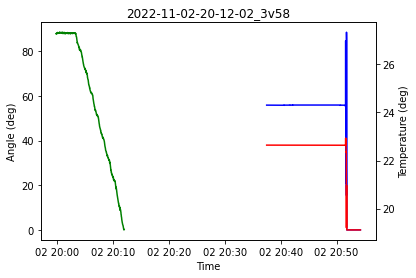

In [6]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

#plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(0,60)
#ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

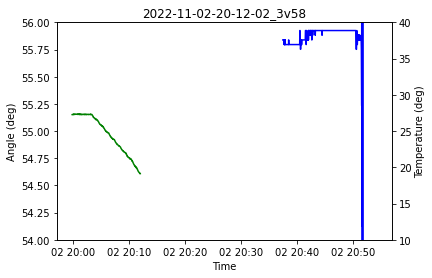

In [7]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

#plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(54,56)
ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

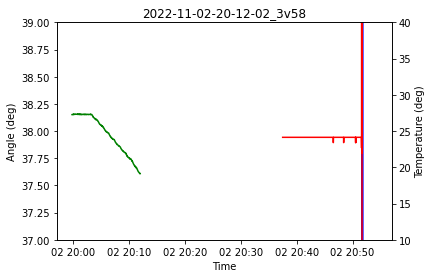

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Angle (deg)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

#plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(37,39)
ax2.set_ylim(10,40)

ax1.plot(time2, df2["2x"], color='b')
ax1.plot(time2, df2["2y"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

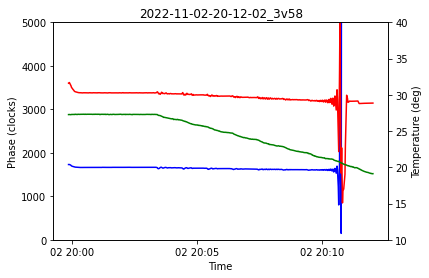

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]
#plt.xlim([xmin,xmax])

ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(0,5000)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

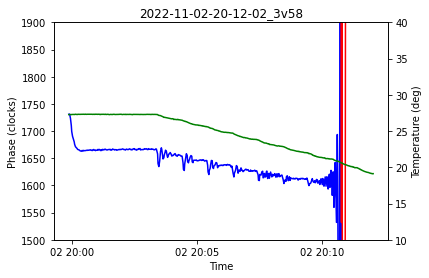

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

#plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(1500,1900)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

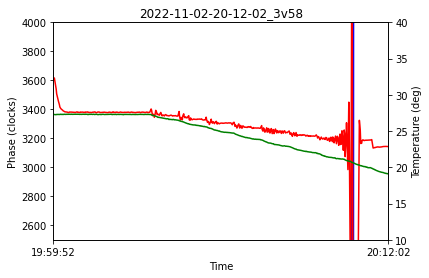

In [11]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Phase (clocks)")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(2500,4000)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["delay_fast"], color='b')
ax1.plot(time1, df1["delay_slow"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

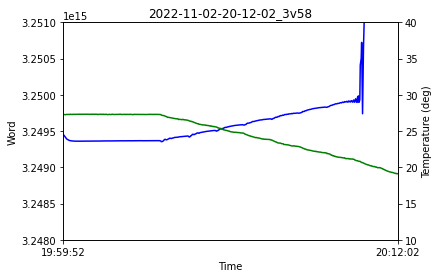

In [12]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Word")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(3.248e15,3.251e15)
ax2.set_ylim(10,40)

ax1.plot(time1, df1["Ch1_word"], color='b')
ax1.plot(time1, df1["Ch2_word"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

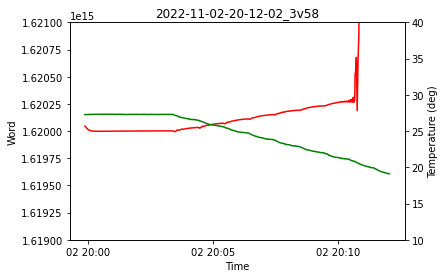

In [13]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Word")
ax2.set_ylabel("Temperature (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]

#plt.xlim([xmin,xmax])
ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
ax1.set_ylim(1.619e15,1.621e15)
ax2.set_ylim(10,40)

#ax1.plot(time1, df1["Ch1_word"], color='b')
ax1.plot(time1, df1["Ch2_word"], color='r')
ax2.plot(time1, df1["temperature"], color='g')

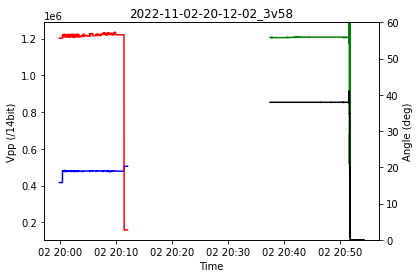

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.set_xlabel("Time")
ax1.set_ylabel("Vpp (/14bit)")
ax2.set_ylabel("Angle (deg)")
plt.title(sample_name)

xmin = time1[0]
xmax =time1[len(time1)-1]
#plt.xlim([xmin,xmax])

ax1.set_xticks([xmin, xmax]) 
ax1.set_xticklabels([xmin.time(), xmax.time()])
#ax1.set_ylim(0,5000)
ax2.set_ylim(0,60)

ax1.plot(time1, df1["vpp_sum1"], color='b')
ax1.plot(time1, df1["vpp_sum2"], color='r')
ax2.plot(time2, df2["2x"], color='g')
ax2.plot(time2, df2["2y"], color='k')